In [ ]:
# petal width and length features

In [11]:
# import neccessaries libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
# load petal data 

data = datasets.load_iris()

dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [50]:
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df1= df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


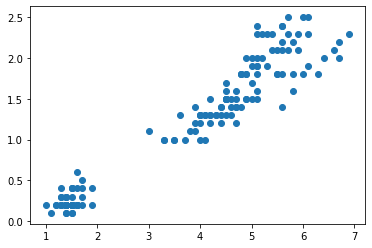

In [52]:
# scatter plot for petal length and width

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])

In [53]:
# initialize for Kmean
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
y_predict = km.fit_predict(df1[['petal length (cm)','petal width (cm)']])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [60]:
df2 = df1.copy()
df2['cluster'] = y_predict

In [61]:
df2.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [58]:
# cluster centroid

km.cluster_centers_

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

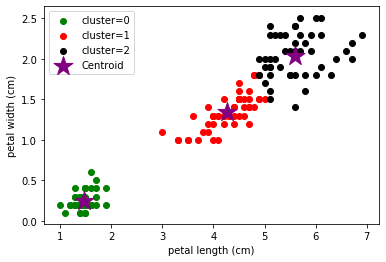

In [70]:
def plot_kmean(df_frame):
    df3= df_frame[df_frame.cluster ==0]
    df4= df_frame[df_frame.cluster ==1]
    df5= df_frame[df_frame.cluster ==2]

    plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'green',label ='cluster=0')
    plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color = 'red',label ='cluster=1')
    plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color = 'black',label ='cluster=2')
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='purple' , marker = "*",label ='Centroid',
               s = 400)

    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend(loc = 'best')
    
    
plot_kmean(df2)    

In [74]:
# elbow technique

k_rng = range(1,10)
sse  = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [75]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.03633387775173,
 9.191170634920635,
 7.774967171717171,
 6.541584461432288]

Text(0, 0.5, 'Sum of squared error')

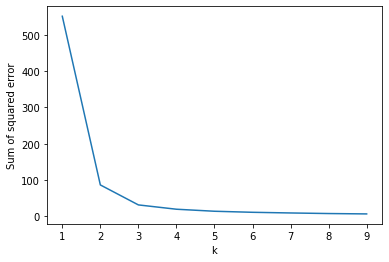

In [73]:
plt.plot(k_rng,sse)
plt.xlabel("k")
plt.ylabel("Sum of squared error")

In [64]:
df5 = df1.copy()

In [65]:
df5

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [67]:
# scalling 

scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df5),columns=df5.columns)


df_scaler.head()


,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


In [82]:
# apply Kmean on scaled data 

km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df_scaler[['petal length (cm)','petal width (cm)']])
df_scaler['cluster'] = y_predict

df_scaler.head()

,petal length (cm),petal width (cm),cluster
0,-1.340227,-1.315444,1
1,-1.340227,-1.315444,1
2,-1.397064,-1.315444,1
3,-1.283389,-1.315444,1
4,-1.340227,-1.315444,1


In [83]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

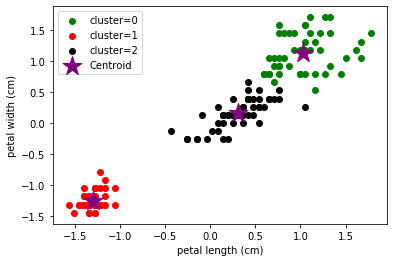

In [84]:
# plot saclar data 

plot_kmean(df_scaler)

In [85]:
# elbow technique

k_rng = range(1,10)
sse_scaler  = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaler[['petal length (cm)','petal width (cm)']])
    sse_scaler.append(km.inertia_)

In [86]:
sse_scaler

[300.0,
 54.16878133149559,
 18.026962612544068,
 12.283372197379126,
 9.14533766127183,
 7.187603589633753,
 6.014311013127113,
 5.1519390848105076,
 4.419295672800331]

Text(0, 0.5, 'Sum of squared error')

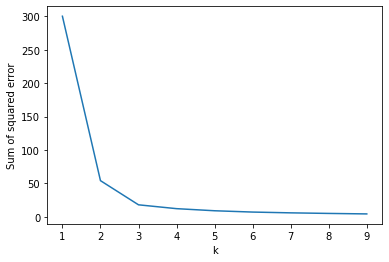

In [87]:
plt.plot(k_rng,sse_scaler)
plt.xlabel("k")
plt.ylabel("Sum of squared error")